In [71]:
import torch
import torchvision
import cv2
import numpy as np   
import sys
sys.path.append('./')
import coco_names
import random
import matplotlib.pyplot as plt

     ---------------------------------------- 72.9/72.9 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 64.2/64.2 kB 3.4 MB/s eta 0:00:00
     -------------------------------------- 104.5/104.5 kB 6.3 MB/s eta 0:00:00
     ------------------------------------- 758.9/758.9 kB 15.9 MB/s eta 0:00:00
     ---------------------------------------- 8.0/8.0 MB 27.0 MB/s eta 0:00:00
     ---------------------------------------- 9.0/9.0 MB 22.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 58.0/58.0 kB 3.2 MB/s eta 0:00:00
     ------------------------------------- 484.2/484.2 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 245.4/245.4 

DEPRECATION: pandas 0.24.2 has a non-standard dependency specifier pytz>=2011k. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pandas or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipywidgets 8.0.6 requires ipython>=6.1.0, but you have ipython 5.5.0 which is incompatible.
jupyter-console 6.6.3 requires ipykernel>=6.14, but you have ipykernel 4.6.1 which is incompatible.
jupyter-console 6.6.3 requires prompt-toolkit>=3.0.30, but you have prompt-toolkit 1.0.18 which is incompatible.
jupyter-server 1.24.0 requires tornado>=6.1.0, but you have tornado 4.5.3 which is incompatible.
nbclassic 1.0.0 requires tornado>=6.1, but you have tornado 4.

In [59]:
model_path='./result/model_19.pth'
image_path='./imgs/2.jpg'
model_name='fasterrcnn_resnet50_fpn'
dataset_name='coco'
score_threshold=5.0

In [11]:
def random_color():
    b = random.randint(0,255)
    g = random.randint(0,255)
    r = random.randint(0,255)

    return (b, g, r)

In [65]:
def main():
    input = []
    if dataset_name == 'coco':
        num_classes = 91
        names = coco_names.names
    #모델 생성
    print("Creating model")
    model = torchvision.models.detection.__dict__[model_name](num_classes=num_classes, pretrained=True)
    model.eval()

    src_img = cv2.imread(image_path)    #cv2로 읽으면 numpy array형식이다.

    img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)  #BGR형태를 RGB형태로 바꾼다.

    img_tensor = torch.from_numpy(img/255.).permute(2,0,1).float()
    input.append(img_tensor)

    out = model(input)
    boxes = out[0]['boxes']
    labels = out[0]['labels']
    scores = out[0]['scores']

    for idx in range(boxes.shape[0]):
        if scores[idx] >= score_threshold:
            x1, y1, x2, y2 = boxes[idx][0], boxes[idx][1], boxes[idx][2], boxes[idx][3]
            name = names.get(str(labels[idx].item()))

            print(src_img.shape, x1, y1, x2, y2)
            cv2.rectangle(src_img, (int(x1), int(y1)), (int(x2), int(y2)), random_color(), thickness=2)
            cv2.putText(src_img, text=name, org=(int(x1), int(y1) + 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, thickness=1, lineType=cv2.LINE_AA, color=(0, 0, 255))


    plt.imshow(src_img)
    


Creating model


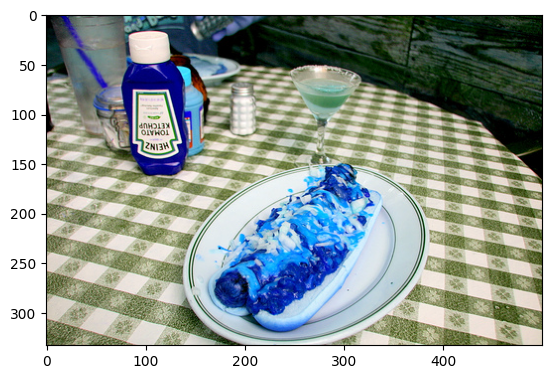

In [66]:
main()